In [1]:
DIR = './data/uniprot/sequences/'
import pickle

with open(DIR + 'vec_train/regressors1.pkl', 'rb') as fp:
    X_train = pickle.load(fp)
print(len(X_train))
with open(DIR + 'vec_test/regressors1.pkl', 'rb') as fp:
    X_test = pickle.load(fp)
print(len(X_test))
with open(DIR + 'vec_train/targets1.pkl', 'rb') as fp:
    y_train = pickle.load(fp)

with open(DIR + 'vec_test/targets1.pkl', 'rb') as fp:
    y_test = pickle.load(fp)
pivot = len(X_train)

28872
43338


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
from tqdm import tqdm_notebook
X = X_train + X_test
y = y_train + y_test
X = scaler.fit_transform(X)
X_train = X[:pivot]
X_test = X[pivot:]
y_train = y[:pivot]
y_test = y[pivot:]

In [3]:
X_test = X_test[:int(len(y_test)/2)]
y_test = y_test[:int(len(y_test)/2)]
print(len(X_train),len(y_train), len(X_test), len(y_test))

28872 28872 21669 21669


In [4]:
len(list(set(y_test)))

12

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0).fit(X_train, y_train)
print(clf1.score(X_train, y_train), clf1.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\chahabiscuit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-ac1c06a16cdd>", line 2, in <module>
    clf1 = ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0).fit(X_train, y_train)
  File "C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\chahabiscuit\Anaconda3\lib\site-packages\joblib\parallel.py", line 1032, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\chahabiscuit\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\chahabiscuit\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\chahabiscuit\Anaconda3\lib\s

TypeError: object of type 'NoneType' has no len()

In [9]:
with open('./data/uniprot/models/extra_trees.pkl', 'wb') as fp:
    pickle.dump(clf1, fp)

In [10]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB().fit(X_train, y_train)
print(clf2.score(X_train, y_train), clf2.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

0.9729842061512884 0.8340562990309183


In [11]:
with open('./data/uniprot/models/GaussianNB.pkl', 'wb') as fp:
    pickle.dump(clf2, fp)

In [12]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(random_state=0, max_iter=40000).fit(X_train, y_train)
print(clf3.score(X_train, y_train), clf3.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

0.9998614574674425 0.8392247346562067


In [13]:
with open('./data/uniprot/models/logreg.pkl', 'wb') as fp:
    pickle.dump(clf3, fp)

In [14]:
from sklearn.svm import SVC
clf4 = SVC(kernel='linear').fit(X_train, y_train)
# print(clf4.score(X_train, y_train), clf4.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [15]:
with open('./data/uniprot/models/svm.pkl', 'wb') as fp:
    pickle.dump(clf4, fp)

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0).fit(X_train, y_train)
# print(clf5.score(X_train, y_train), clf5.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [17]:
with open('./data/uniprot/models/random_forest.pkl', 'wb') as fp:
    pickle.dump(clf5, fp)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf6 = KNeighborsClassifier(n_neighbors= 7, weights='distance', algorithm='auto', metric='euclidean', n_jobs=-1).fit(X_train, y_train)
# print(clf6.score(X_train, y_train), clf6.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [19]:
with open('./data/uniprot/models/knn.pkl', 'wb') as fp:
    pickle.dump(clf4, fp)

In [20]:
from sklearn.svm import SVC
clf7 = SVC(kernel='rbf').fit(X_train, y_train)
# print(clf7.score(X_train, y_train), clf7.score(X_test[int(len(y_test)/2):], y_test[int(len(y_test)/2):]))

In [4]:
with open('./data/uniprot/models/svm_rbf.pkl', 'rb') as fp:
    clf7 = pickle.load(fp)

In [5]:
print('HEHE END !!')

HEHE END !!


In [21]:
classifiers = {
    'extra_trees' : clf1,
    'gnb' : clf2,
    'logreg' : clf3,
    'svm_linear' : clf4,
    'random_forest' : clf5,
    'knn' : clf6,
    'svm_rbf' : clf7,
}
with open('./data/uniprot/models/classifiers.pkl', 'wb') as fp:
    pickle.dump(classifiers, fp)

# for i in range(1, 8):
#     print(i, classifiers['clf'+str(i)].score(X, y))

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


svm_rbf



RuntimeError: tiff codec initialization failed

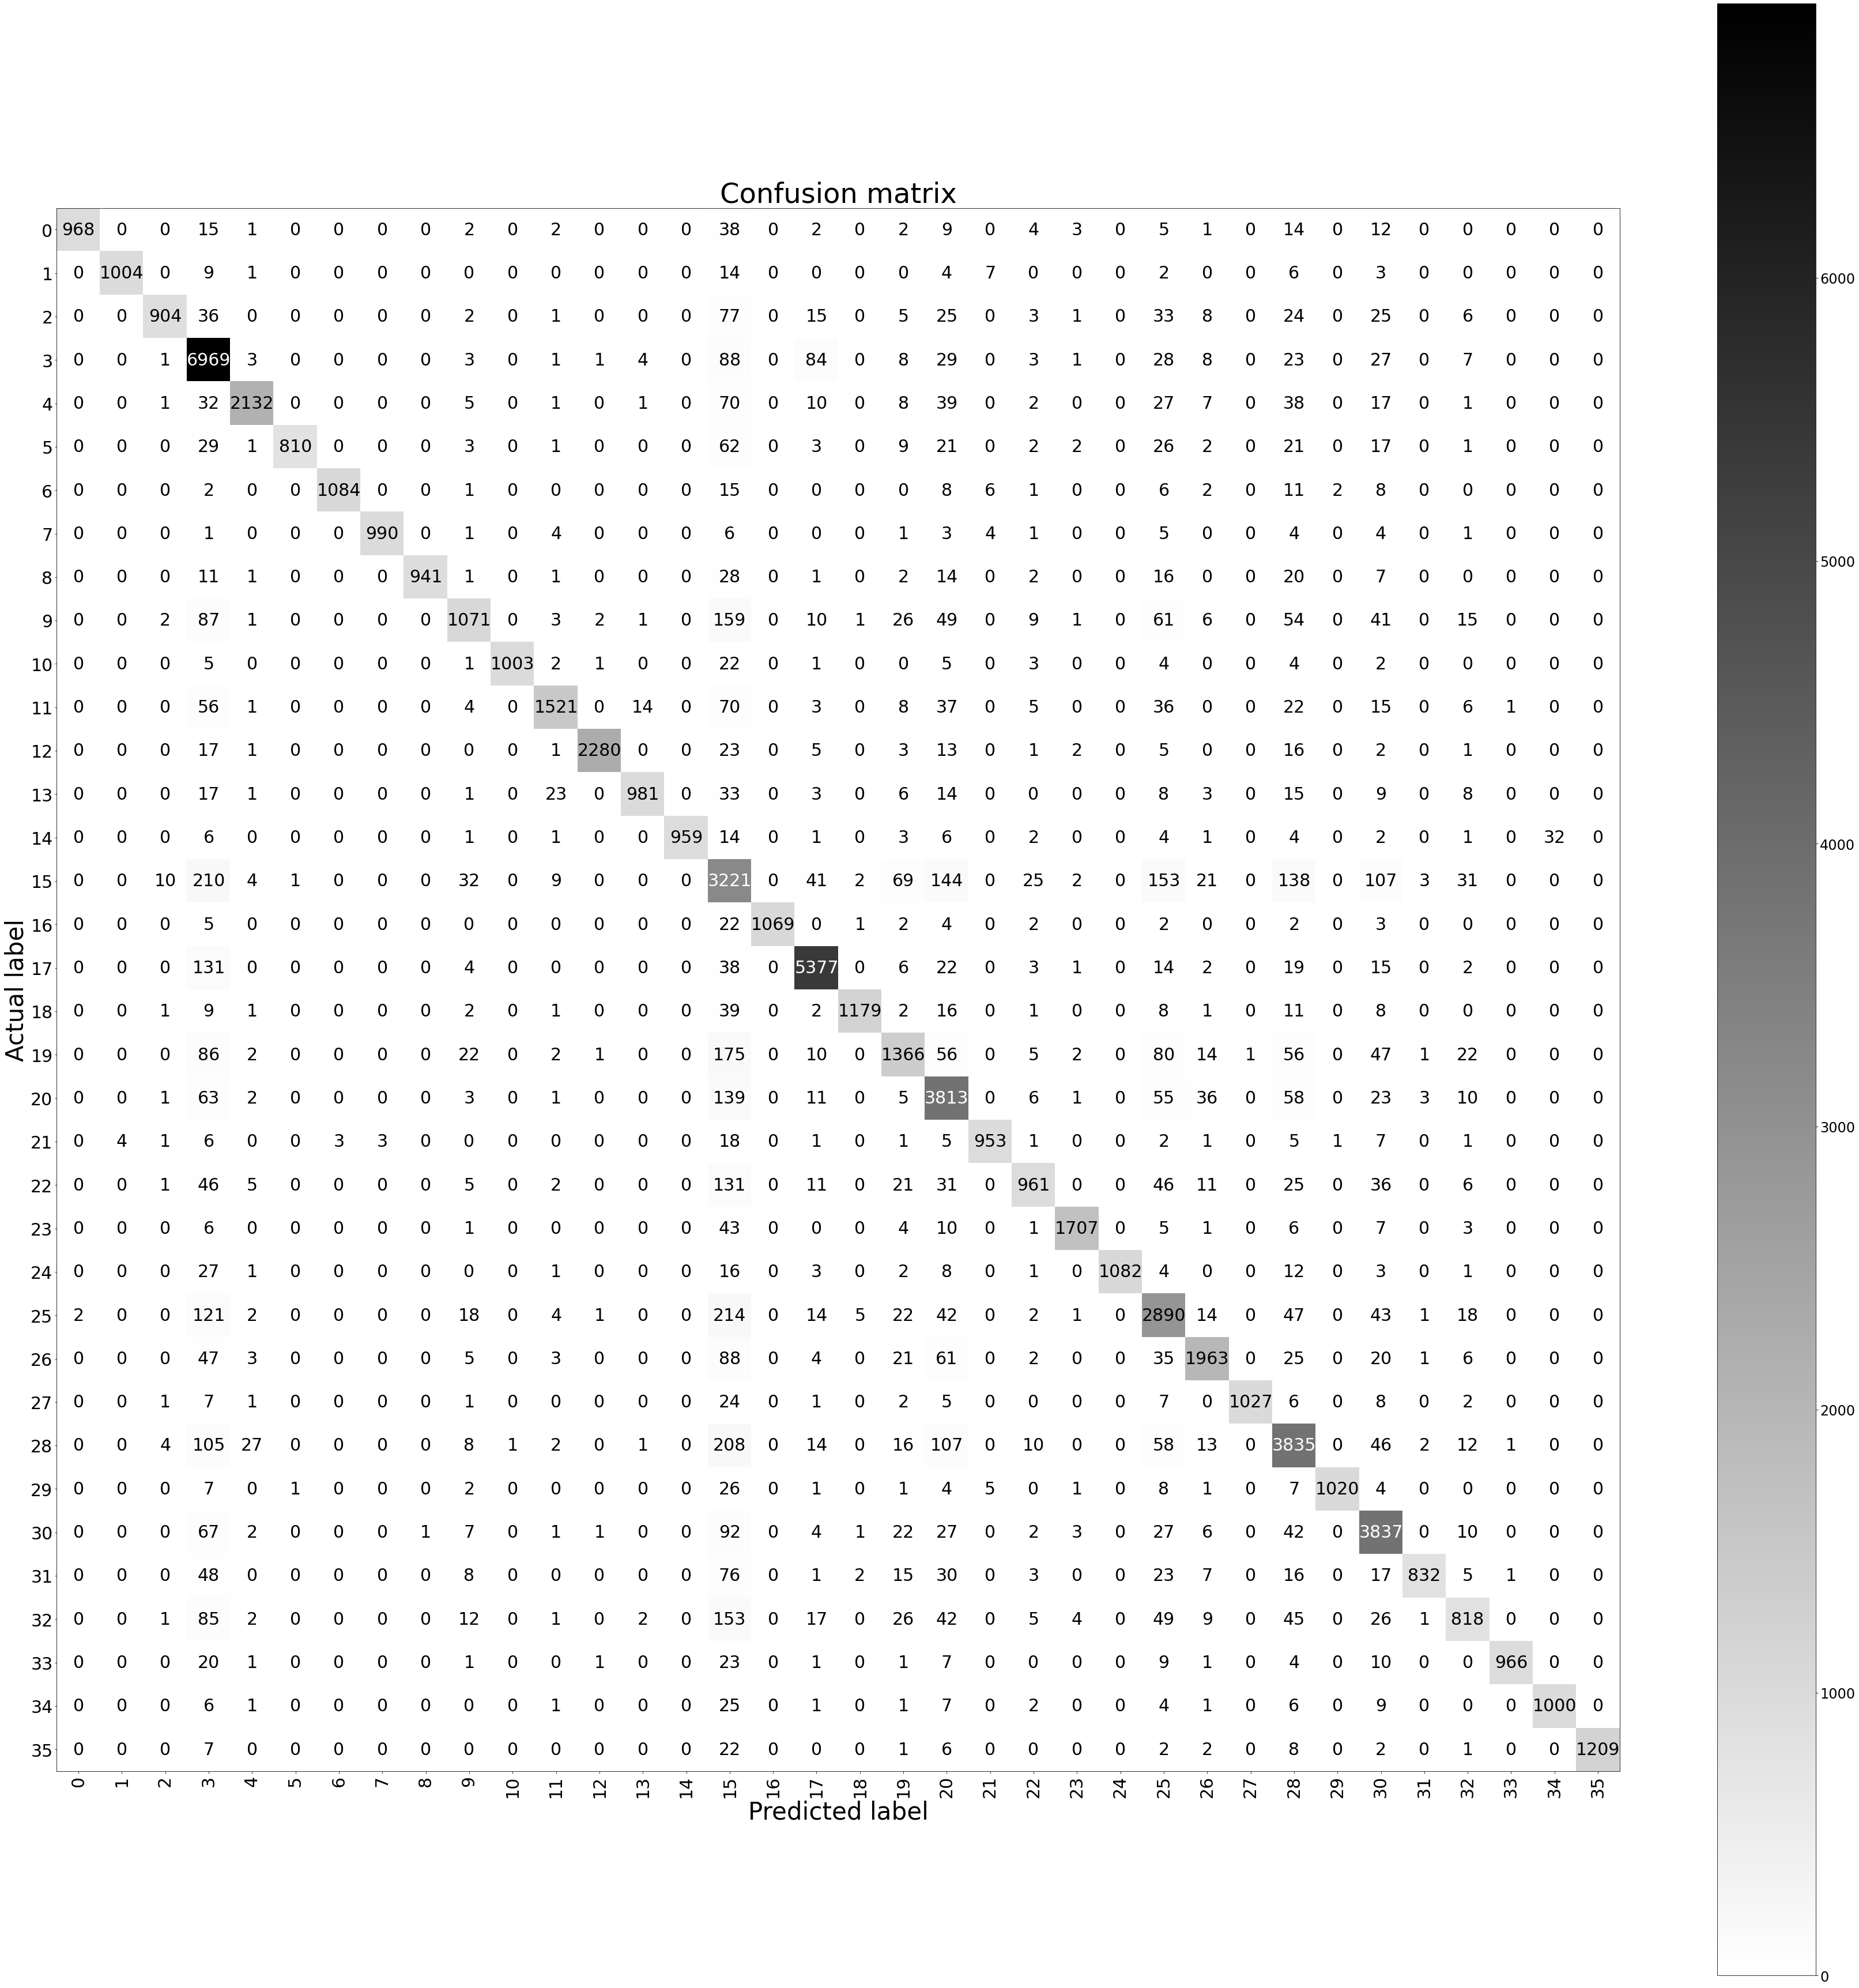

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

temp_y = []
for i in y:
    if i.endswith('\n'):
        temp_y.append(i[:-1])
    else:
        temp_y.append(i)
y = temp_y

# for i in y_train:
#     if i.endswith('\n'):
#         temp_y.append(i[:-1])
#     else:
#         temp_y.append(i)
# y_train = temp_y


# temp_y = []
# for i in y_test:
#     if i.endswith('\n'):
#         temp_y.append(i[:-1])
#     else:
#         temp_y.append(i)
# y_test = temp_y
# y = list(y_train) + list(y_test)



temp = list(set(y))
d = dict(zip(temp, [i for i in range(len(temp))]))
temp_y = []
for i in y:
    temp_y.append(d[i])
y = temp_y
y[0]
y_true = y

x = 'svm_rbf'
files = x.split(' ')
for file in tqdm_notebook(files):
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        classifier = pickle.load(pkl)
    print(file)
    y_preds = classifier.predict(X)
    temp = []
    for j in y_preds:
        if j.endswith('\n'):
            temp.append(j[:-1])
        else:
            temp.append(j)
    y_preds = [d[j] for j in temp]
    cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(48,48))
plt.imshow(cm, interpolation='nearest', cmap='gray_r')
plt.title('Confusion matrix', size = 48)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(24)
tick_marks = np.arange(36)
plt.xticks(tick_marks, [i for i in list(set(y_true))], rotation=90, size = 30)
plt.yticks(tick_marks, [i for i in list(set(y_true))], size = 30)
plt.tight_layout()
plt.ylabel('Actual label', size = 42)
plt.xlabel('Predicted label', size = 42)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        if cm[x][y] > 3000:
            plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center', size=30, color='white')
        else:
            plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center', size=30)
plt.savefig('Z:/Projects/Protein Family Prediction using Document Embedding (SUCCESS)/Paper Submission/latest/confusion_matrix.tif', dpi=300, pil_kwargs={"compression": "tiff_lzw"})

In [4]:
cm = confusion_matrix(y_true, y_preds)
plt.figure(figsize=(80,80))
plt.imshow(cm, interpolation='nearest', cmap='gray_r')
plt.title('Confusion matrix', size = 70)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(80)
tick_marks = np.arange(36)
plt.xticks(tick_marks, [i for i in list(set(y_true))], rotation=90, size = 80)
plt.yticks(tick_marks, [i for i in list(set(y_true))], size = 80)
plt.tight_layout()
plt.ylabel('Actual label', size = 100)
plt.xlabel('Predicted label', size = 100)

width, height = cm.shape
for x in range(width):
    for y in range(height):
        if cm[x][y] > 3000:
            plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center', size=80, color='white', rotation=45)
        else:
            plt.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center', size=80, rotation=45)
plt.tight_layout()
plt.savefig('Z:/Projects/Protein Family Prediction using Document Embedding (SUCCESS)/Paper Submission/latest/confusion_matrix_2.tif', dpi=300)

NameError: name 'confusion_matrix' is not defined

In [10]:
for i in cm:
    for j in i:
        print(j, end=', ')
    print()

968, 0, 0, 15, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 38, 0, 2, 0, 2, 9, 0, 4, 3, 0, 5, 1, 0, 14, 0, 12, 0, 0, 0, 0, 0, 
0, 1004, 0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 4, 7, 0, 0, 0, 2, 0, 0, 6, 0, 3, 0, 0, 0, 0, 0, 
0, 0, 904, 36, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 77, 0, 15, 0, 5, 25, 0, 3, 1, 0, 33, 8, 0, 24, 0, 25, 0, 6, 0, 0, 0, 
0, 0, 1, 6969, 3, 0, 0, 0, 0, 3, 0, 1, 1, 4, 0, 88, 0, 84, 0, 8, 29, 0, 3, 1, 0, 28, 8, 0, 23, 0, 27, 0, 7, 0, 0, 0, 
0, 0, 1, 32, 2132, 0, 0, 0, 0, 5, 0, 1, 0, 1, 0, 70, 0, 10, 0, 8, 39, 0, 2, 0, 0, 27, 7, 0, 38, 0, 17, 0, 1, 0, 0, 0, 
0, 0, 0, 29, 1, 810, 0, 0, 0, 3, 0, 1, 0, 0, 0, 62, 0, 3, 0, 9, 21, 0, 2, 2, 0, 26, 2, 0, 21, 0, 17, 0, 1, 0, 0, 0, 
0, 0, 0, 2, 0, 0, 1084, 0, 0, 1, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 8, 6, 1, 0, 0, 6, 2, 0, 11, 2, 8, 0, 0, 0, 0, 0, 
0, 0, 0, 1, 0, 0, 0, 990, 0, 1, 0, 4, 0, 0, 0, 6, 0, 0, 0, 1, 3, 4, 1, 0, 0, 5, 0, 0, 4, 0, 4, 0, 1, 0, 0, 0, 
0, 0, 0, 11, 1, 0, 0, 0, 941, 1, 0, 1, 0, 0, 0, 28, 0, 1, 0, 2, 14, 0, 2, 0

In [43]:
import pandas as pd
df = pd.DataFrame(list(zip(list(d.values()), list(d.keys()))), columns=['Label', 'Protein Family'])
df.to_csv('./data/Uniprot/family.csv')

In [44]:
df['Frequency'] = 0

In [45]:
y = y_train + y_test
df.head()

ValueError: operands could not be broadcast together with shapes (28872,36) (10834,12) 

In [100]:
for i in y:
    if i.endswith('\n'):
        fam = i[:-1]
    else:
        fam = i
    df.loc[df['Protein Family'] == fam, ['Frequency']] += 1
df.head()

,Label,Protein Family,Frequency
0,0,universal ribosomal protein uS4 family,1146
1,1,universal ribosomal protein uS2 family,1092
2,2,ABC transporter superfamily,3461
3,3,small GTPase superfamily,1165
4,4,aspartate/ornithine carbamoyltransferase super...,1122


In [101]:
df.to_csv('./data/Uniprot/family.csv')

In [5]:
with open('./data/uniprot/models/classifiers.pkl', 'rb') as fp:
    classifiers = pickle.load(fp)

EOFError: Ran out of input

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(y_train[0])
temp_y = []
for i in y_train:
    if i.endswith('\n'):
        temp_y.append(i[:-1])
    else:
        temp_y.append(i)
y_train = temp_y


temp_y = []
for i in y_test:
    if i.endswith('\n'):
        temp_y.append(i[:-1])
    else:
        temp_y.append(i)
y_test = temp_y
y = y_train + y_test




temp = list(set(y))
# d = dict(zip(temp, [i for i in range(len(temp))]))

with open ('./data/uniprot/models/label2idx.pkl', 'rb') as pkl:
    d = pickle.load(pkl)
temp_y = []
for i in y:
    temp_y.append(d[i])
y = temp_y
y_train = [d[i] for i in y_train]
y_test = [d[i] for i in y_test]
y[0]
y_true = y
print(y_train[0])
len(list(set(y_train)))

chaperonin (HSP60) family
32


36

In [5]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [6]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=44)

In [7]:
len(list(set(list(y_train))))

36

In [8]:
y_train = label_binarize(np.array(y_train), classes=list(set(y_train)))
y_test = label_binarize(np.array(y_test), classes=list(set(y_test)))

In [9]:
y_test.shape[1]

36

In [11]:
n_classes = y_train.shape[1]
n_samples, n_features = X.shape
import os
def plot_roc(clf, file, linestyle):
    classifier = OneVsRestClassifier(clf)
    if os.path.exists('./data/uniprot/models/' + file + '.pkl'):
        with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
            model = pickle.load(pkl)
    else:
        model = classifier.fit(X_train, y_train)
        with open ('./data/uniprot/models/' + file + '.pkl', 'wb') as pkl:
            pickle.dump(model, pkl)
    if file.endswith('linear') or file.endswith('rbf'):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw = 2

    
    print(file)
#     print(model.score(X_train, y_train), model.score(X_test, y_test), model.score(X, y))
    plt.rcParams["figure.figsize"] = (8,5)
    plt.rcParams['xtick.labelsize']= 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.plot(fpr[2], tpr[2],
             lw=lw, label=file + ' (area = %0.2f)' % roc_auc[2], color='black', linestyle=linestyle)
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.title('Receiver operating characteristic Plot on DBOW Data', size=16)
    plt.legend(loc="lower right", fontsize=8)

In [12]:
from collections import OrderedDict

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

DBOW Extra Trees Classifier
DBOW Gaussian Naive Bayes
DBOW Logistic Regression
DBOW Random Forest Classifier
DBOW K-Nearest Neighbor
DBOW SVM kernel=linear
DBOW SVM kernel=rbf


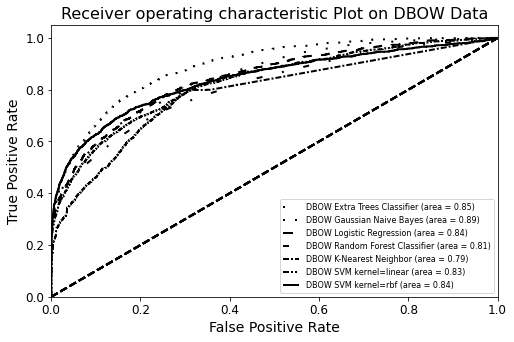

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


plot_roc(ExtraTreesClassifier(n_estimators=100, max_features="auto",random_state=0), 'DBOW Extra Trees Classifier', linestyles['loosely dotted'])
plot_roc(GaussianNB(), 'DBOW Gaussian Naive Bayes', linestyles['dotted'])
plot_roc(LogisticRegression(random_state=0, max_iter=40000), 'DBOW Logistic Regression', linestyles['dashed'])
plot_roc(RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0), 'DBOW Random Forest Classifier', linestyles['loosely dashdotted'])
plot_roc(KNeighborsClassifier(n_neighbors= 7, weights='distance', algorithm='auto', metric='euclidean', n_jobs=-1), 'DBOW K-Nearest Neighbor', linestyles['densely dashdotted'])
plot_roc(SVC(kernel='linear'), 'DBOW SVM kernel=linear', linestyles['densely dashdotdotted'])
plot_roc(SVC(kernel='rbf'), 'DBOW SVM kernel=rbf', linestyles['solid'])
plt.savefig('Z:/Projects/Protein Family Prediction using Document Embedding (SUCCESS)/Paper Submission/latest/dbow_roc.tif', dpi=600)

DBOW Gaussian Naive Bayes
Average precision score, micro-averaged over all classes: 0.83


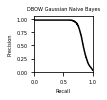

DBOW Extra Trees Classifier
Average precision score, micro-averaged over all classes: 0.80


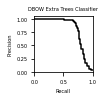

DBOW SVM kernel=linear
Average precision score, micro-averaged over all classes: 0.76


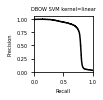

DBOW Logistic Regression
Average precision score, micro-averaged over all classes: 0.82


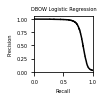

DBOW Random Forest Classifier
Average precision score, micro-averaged over all classes: 0.77


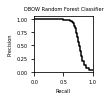

DBOW K-Nearest Neighbor
Average precision score, micro-averaged over all classes: 0.63


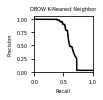

DBOW SVM kernel=rbf
Average precision score, micro-averaged over all classes: 0.85


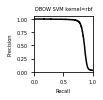

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, recall_score
files = ['DBOW Gaussian Naive Bayes', 'DBOW Extra Trees Classifier', 'DBOW SVM kernel=linear', 'DBOW Logistic Regression', 'DBOW Random Forest Classifier', 'DBOW K-Nearest Neighbor', 'DBOW SVM kernel=rbf']
for file in files:
    print(file)
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    if file.endswith('linear') or file.endswith('rbf'):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)
    # For each class
    precision = dict()
    recall = dict()
    thresh = dict()
    f1 = dict()
    average_precision = dict()
    average_recall = dict()
    average_f1_score = dict()
    for i in range(n_classes):
        precision[i], recall[i], thresh[i] = precision_recall_curve(y_test[:, i],
                                                            y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], thresh['micro'] = precision_recall_curve(y_test.ravel(),
        y_score.ravel())
    
#     f1['micro'] = 2 * (precision['micro']*recall['micro']) / (precision['micro']+recall['micro'])
    
    average_precision["micro"] = average_precision_score(y_test, y_score,
                                                         average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))
    
    
    plt.rcParams["figure.figsize"] = (1.5,1.5)    
    plt.rcParams['xtick.labelsize']=5
    plt.rcParams['ytick.labelsize']=5
    plt.step(recall['micro'], precision['micro'], where='post', color='black')
    plt.xlabel('Recall', size=5)
    plt.ylabel('Precision', size=5)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title( file, size=5)
    plt.tight_layout()
    plt.savefig('Z:/Projects/Protein Family Prediction using Document Embedding (SUCCESS)/Paper Submission/latest/'+file+'.tif', dpi=600)
    plt.show()
    
#     plt.figure()
#     plt.step(thresh['micro'], f1['micro'][:-1], where='post')
#     plt.xlabel('F1 Score')
#     plt.ylabel('Threshold')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('F1-Score, micro-averaged over all classes vs Threshold')
#     plt.show()
#     print(file + ' Threshold = ', thresh['micro'][np.argmax(f1['micro'][:-1])])
#     break

DBOW Gaussian Naive Bayes
Average precision score, micro-averaged over all classes: 0.83


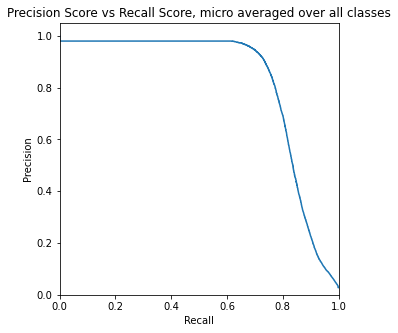

DBOW Extra Trees Classifier
Average precision score, micro-averaged over all classes: 0.80


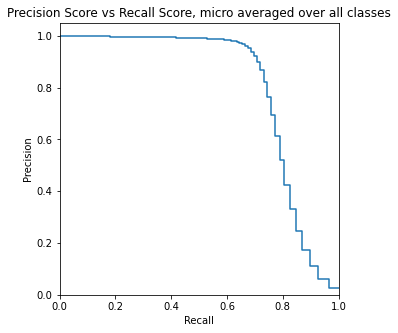

DBOW Logistic Regression
Average precision score, micro-averaged over all classes: 0.82


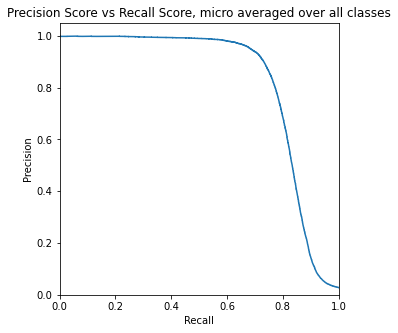

DBOW Random Forest Classifier
Average precision score, micro-averaged over all classes: 0.77


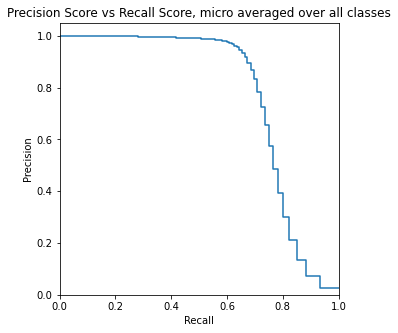

DBOW K-Nearest Neighbor
Average precision score, micro-averaged over all classes: 0.63


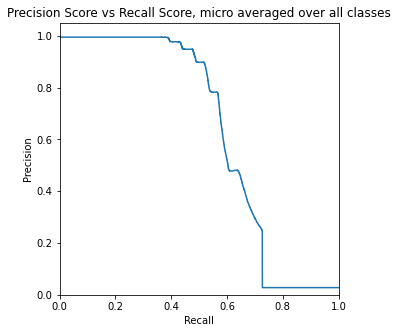

DBOW SVM kernel=linear
Average precision score, micro-averaged over all classes: 0.76


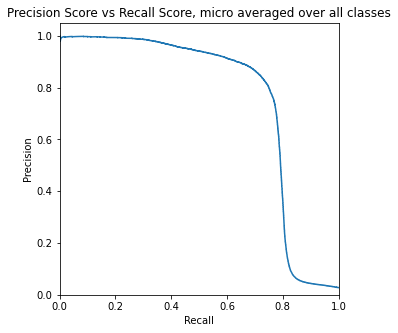

DBOW SVM kernel=rbf
Average precision score, micro-averaged over all classes: 0.85


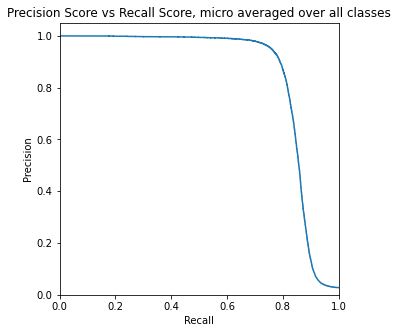

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, recall_score
files = ['DBOW Gaussian Naive Bayes', 'DBOW Extra Trees Classifier', 'DBOW Logistic Regression', 'DBOW Random Forest Classifier', 'DBOW K-Nearest Neighbor', 'DBOW SVM kernel=linear', 'DBOW SVM kernel=rbf']
for file in files:
    print(file)
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    if file.endswith('linear') or file.endswith('rbf'):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict_proba(X_test)
    # For each class
    precision = dict()
    recall = dict()
    thresh = dict()
    f1 = dict()
    average_precision = dict()
    average_recall = dict()
    average_f1_score = dict()
    for i in range(n_classes):
        precision[i], recall[i], thresh[i] = precision_recall_curve(y_test[:, i],
                                                            y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], thresh['micro'] = precision_recall_curve(y_test.ravel(),
        y_score.ravel())
    
    
    average_precision["micro"] = average_precision_score(y_test, y_score,
                                                         average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))
#     average_recall['micro'] = recall_score(y_test, y_score, average='micro')
#     print('Average recall score, micro-averaged over all classes: {0:0.2f}'
#           .format(average_recall["micro"]))
#     average_f1_score['micro'] = 2*average_precision['micro']*average_recall['micro']/(average_precision['micro']+average_recall['micro'])
#     print(('Average F1 score, micro-averaged over all classes: {0:0.2f}'
#           .format(average_f1_score["micro"])))
    plt.figure(figsize=(5,5))
    plt.step(recall['micro'], precision['micro'], where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title( 'Precision Score vs Recall Score, micro averaged over all classes')
    plt.show()
    
#     plt.figure()
#     plt.step(thresh['micro'], f1['micro'][:-1], where='post')
#     plt.xlabel('F1 Score')
#     plt.ylabel('Threshold')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('F1-Score, micro-averaged over all classes vs Threshold')
#     plt.show()
#     print(file + ' Threshold = ', thresh['micro'][np.argmax(f1['micro'][:-1])])

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook
import pickle
with open ('./data/uniprot/models/label2idx.pkl', 'rb') as pkl:
    d = pickle.load(pkl)
idx2label = dict(zip(d.values(), d.keys()))

files = ['DBOW SVM kernel=linear', 'DBOW Gaussian Naive Bayes', 'DBOW Extra Trees Classifier', 'DBOW Logistic Regression', 'DBOW Random Forest Classifier', 'DBOW K-Nearest Neighbor', 'DBOW SVM kernel=rbf']
thresholds = [0.1511, 0.1842, 0.14, 0.64479, 0.14, 0.4336, 0.5]
# files = ['DBOW Logistic Regression']
for file, thresh in tqdm_notebook(zip(files, thresholds)):
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    y_pred = model.predict(X_test)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    testing_acc = accuracy_score(y_pred, y_test)
    
    y_pred = model.predict(X_train)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    training_acc = accuracy_score(y_pred, y_train)
    
    y_pred = model.predict(X)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    avg_acc = accuracy_score(y_pred, y)
    print('One-vs-All', file, training_acc, testing_acc, avg_acc)

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


One-vs-All DBOW SVM kernel=linear 0.9986838459407038 0.7172689095020536 0.8297881179891982
One-vs-All DBOW Gaussian Naive Bayes 0.9471460238293156 0.7243989108865199 0.8134607395097632
One-vs-All DBOW Extra Trees Classifier 1.0 0.4251465226821727 0.6549923833264091
One-vs-All DBOW Logistic Regression 0.9967788861180382 0.7328672296829573 0.8383880348982136
One-vs-All DBOW Random Forest Classifier 0.9999653643668607 0.40871752272832157 0.6451184046530951


C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



0.7328672296829573


In [ ]:
files = ['DBOW K-Nearest Neighbor', 'DBOW SVM kernel=rbf']
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import pickle
with open ('./data/uniprot/models/label2idx.pkl', 'rb') as pkl:
    d = pickle.load(pkl)
idx2label = dict(zip(d.values(), d.keys()))
thresholds = [0.4336, 0.5]
# files = ['DBOW Logistic Regression']
for file, thresh in tqdm(zip(files, thresholds)):
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    print('One-vs-All', file)
    y_pred = model.predict(X_test)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    testing_acc = accuracy_score(y_pred, y_test) 
    print(testing_acc)
    y_pred = model.predict(X_train)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    training_acc = accuracy_score(y_pred, y_train)
    print(training_acc)
    y_pred = model.predict(X)
    y_pred = [idx2label[np.argmax(pred)] for pred in y_pred]
    avg_acc = accuracy_score(y_pred, y)
    print(avg_acc)

0it [00:00, ?it/s]

One-vs-All DBOW K-Nearest Neighbor


In [23]:
from sklearn.metrics import normalized_mutual_info_score, classification_report
import numpy as np
x = 'extra_trees GaussianNB logreg svm random_forest knn svm_rbf'
files = x.split(' ')
for file in tqdm_notebook(files):
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    print(file)
    
#     y_preds = [np.argmax(i) for i in model.predict(X_train)]
#     nmi = normalized_mutual_info_score(y_train, y_preds,average_method='arithmetic')
#     print('Training NMI - ', nmi)
    y_preds = model.predict(X_test)
    nmi = normalized_mutual_info_score(y_test, y_preds,average_method='arithmetic')
    report = classification_report(y_test, y_preds)
    print(model.score(X_test, y_test))
    print('Testing NMI - ', nmi)
    print(report)
    
#     y_preds = [np.argmax(i) for i in model.predict(X)]
#     nmi = normalized_mutual_info_score(y, y_preds,average_method='arithmetic')
#     print('Average NMI - ', nmi)
    print('\n')

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


extra_trees


C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7935760764225391
Testing NMI -  0.6418344405670587
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.89      0.94       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
          

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8240343347639485
Testing NMI -  0.6952578524585372
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       0.98      0.93      0.95       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
                                     chaperonin (HSP60) family       1.00      0.91      0.95       668
        cl

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7984678573076746
Testing NMI -  0.6493296104996964
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.90      0.95       756
                                                MurCDEF family       0.00      0.00      0.00         0
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7814389219622502
Testing NMI -  0.6370107548848033
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.91      0.95       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
          

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7944990539480363
Testing NMI -  0.642498349721691
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.85      0.92       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
           

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7814389219622502
Testing NMI -  0.6370107548848033
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.91      0.95       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
          

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8346024274308921
Testing NMI -  0.7092537797563981
                                                                precision    recall  f1-score   support

                                   ABC transporter superfamily       0.00      0.00      0.00         0
                               ATPase alpha/beta chains family       0.00      0.00      0.00         0
                                      DEAD box helicase family       0.00      0.00      0.00         0
                           G-protein coupled receptor 1 family       0.00      0.00      0.00         0
                                              HisA/HisF family       1.00      0.93      0.97       756
TRAFAC class TrmE-Era-EngA-EngB-Septin-like GTPase superfamily       0.00      0.00      0.00         0
            TRAFAC class translation factor GTPase superfamily       0.00      0.00      0.00         0
          aspartate/ornithine carbamoyltransferase superfamily       0.00      0.00      0.00         0
          

In [24]:
from sklearn.metrics import normalized_mutual_info_score, classification_report
import numpy as np
x = 'extra_trees GaussianNB logreg svm random_forest knn svm_rbf'
files = x.split(' ')
for file in tqdm_notebook(files):
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    print(file)
    print(model.score(X_train, y_train))
    print(model.score(X, y))

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


extra_trees
1.0
0.8509347735770669
GaussianNB
0.9729842061512884
0.86439551308683
logreg
0.9998614574674425
0.8692563356875779
svm
1.0
0.8644232100817061
random_forest
1.0
0.8507131976180584
knn
1.0
0.8644232100817061
svm_rbf
0.9940080354668883
0.8827309236947791



In [25]:
from sklearn.metrics import normalized_mutual_info_score, classification_report
import numpy as np
x = 'extra_trees GaussianNB logreg svm random_forest knn svm_rbf'
files = x.split(' ')
for file in tqdm_notebook(files):
    with open ('./data/uniprot/models/' + file + '.pkl', 'rb') as pkl:
        model = pickle.load(pkl)
    print(file)
    
    y_preds = model.predict(X_train)
    nmi = normalized_mutual_info_score(y_train, y_preds,average_method='arithmetic')
    print('Training NMI - ', nmi)
    y_preds = model.predict(X)
    nmi = normalized_mutual_info_score(y, y_preds,average_method='arithmetic')
    print('Average NMI - ', nmi)
    print('\n')

C:\Users\chahabiscuit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


extra_trees
Training NMI -  1.0
Average NMI -  0.7819105771517726


GaussianNB
Training NMI -  0.9501512059740622
Average NMI -  0.7974722503175454


logreg
Training NMI -  0.9996536056130052
Average NMI -  0.7879845376785107


svm
Training NMI -  1.0
Average NMI -  0.7841456443436029


random_forest
Training NMI -  1.0
Average NMI -  0.7814326054876862


knn
Training NMI -  1.0
Average NMI -  0.7841456443436029


svm_rbf
Training NMI -  0.9878893143343279
Average NMI -  0.8167226881716187



